# COMP186: Foundations of Artificial Intelligence Individual Coursework

### Authors: Sahan Bulathwela, Hossein A. (Saeed) Rahmani, Xiao Fu and Joshua Spear

#### Contact: 

NB: Please do **not** discuss the Coursework in the forum or any other public medium. Please ask directly during office hours or any time via an email directed to the TA assigned to the part of the assignment. The tutor and the TAs will respond either via email or via a public announcement to all students.

If you have any questions/clarifications regarding the coursework, please contact the TA responsible for that part of the coursework **via email**. 
- Part 1: Wiem Ben Rim (wiem.rim.23@ucl.ac.uk)
- Part 2: Xiao Fu (xiao.fu.20@ucl.ac.uk)
- Part 3: Lynn Kandakji (l.kandakji.22@ucl.ac.uk)

- General Clarifications: Sahan Bulathwela (m.bulathwela@ucl.ac.uk)

This coursework presents a real-world dataset to the learners where they are expected to systematically develop a model that can make good predictions. The coursework attempts to test both the theoretical and practical understanding of the learners regarding training machine learning models. 

## Coursework Structure

This coursework consists of three parts. 

1. Exploratory data analysis and data preparation
2. Model training and evaluation
3. Demonstrating the theoretical understanding of a regression model

Parts 1 and 2 of the coursework involves multiple subtasks of building a machine learning model from data preparation to model evaluation. Part 3 systematically assists the learner to take their mathematical understanding of machine learning and build learning algorithms from scratch. 

## Guidelines to Providing Solutions

- This is an **INDIVIDUAL** coursework.
- The main questions are marked in $\color{red}{red}$ to improve visibility (e.e. $\color{red}{Question\ x.x}$).
- This coursework consists of 3 parts where Part 1 and 2 carry 30 marks each and part 3 carries 40 marks.
- Each part will be marked **independently**. For example, Part 2 will be marked based solely on the code and answers provided within Part 2; answers from Part 1 or part 3 will not be considered.  
- It is expected that learners provide solutions to **ALL** parts of the coursework **in this notebook itself**.
- The learners are expected to provide solutions in this Jupyter notebook itself (Both Code and text answers.).
- The solutions should be provided in the spaces provided. You may add new cells where it is necessary.
- Cells where answers are required in English text is marked with `Your Answer Here`
    - You can use markdown language to add formatting to your text. A cheat sheet is found [here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
    - Where you feel that mathematical notation is required, you can use latex syntax (e.g. `$x = 2^5$`:  $x = 2^5$)
    - Alternatively, you are allowed to attach a image of your mathematical derivations.
- Cells where program code is expected, it is marked with `Your Code Here`.
    - You are expected to provide solutions in **Python** programming language
    - You should implement the code in a way that the function signature is preserved where the function skeleton is already provided (ie, mainly 1) function name 2) input parameters and 3) output parameters). 
    - Where external datasets are used, use their **relative path** in the code. This simplifies reproducing results during assessment.
    - Use commenting (`# example comment here`) to describe the crucial steps in your programming code. This will help the examiner to understand your work. 
    
## Uploading Solutions

- It is expected that a **single** `.zip` file is uploaded as the solution. 
- Zip the **same folder** that was provided as the assignment.
- The zipped directory should have the following files.
    - The completed assignment notebook (With Python code and English Text)
    - A PDF printout of the solutions notebook where all the output cells have been executed and the solution outputs are visible in the notebook. (**THIS IS NOT A SEPARATE  PDF REPORT !!!**)
    - The `lectures_dataset.csv`dataset CSV file (in the same relative file location where the file can be loaded to the notebook by executing the relevant cell in the solution notebook.)
    - Any additional data files you generated that become input to your solutions (put the files in the relative file locations that will allow loading the files to the notebook to execute your solution.)

## Video Lectures Dataset

This coursework works with a collection of video lectures. Different characteristics identified from the meta data, video data and transcripts of the lectures are included in the `lectures_dataset.csv` dataset. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# import matplotlib as plt
data_path = "lectures_dataset.csv"
lectures = pd.read_csv(data_path)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import os


In [2]:
lectures.head(10)

,auxiliary_rate,conjugate_rate,normalization_rate,tobe_verb_rate,preposition_rate,pronoun_rate,document_entropy,easiness,fraction_stopword_coverage,fraction_stopword_presence,...,title_word_count,word_count,most_covered_topic,topic_coverage,duration,lecture_type,has_parts,speaker_speed,silent_period_rate,median_engagement
0,0.013323,0.033309,0.034049,0.035159,0.121392,0.089563,7.753995,75.583936,0.428135,0.553664,...,9,2668,http://en.wikipedia.org/wiki/Kernel_density_es...,0.414578,890,vl,False,2.997753,0.000000,0.502923
1,0.014363,0.030668,0.018763,0.036749,0.095885,0.103002,8.305269,86.870523,0.602446,0.584498,...,6,7512,http://en.wikipedia.org/wiki/Interest_rate,0.292437,2850,vl,False,2.635789,0.000000,0.011989
2,0.019028,0.033242,0.030720,0.037827,0.118294,0.124255,7.965583,81.915968,0.525994,0.605685,...,3,4264,http://en.wikipedia.org/wiki/Normal_distribution,0.271424,1680,vit,False,2.538095,0.000000,0.041627
3,0.023416,0.042700,0.016873,0.046832,0.122590,0.104339,8.142877,80.148937,0.504587,0.593664,...,9,2869,http://en.wikipedia.org/wiki/Matrix_(mathematics),0.308092,1270,vl,False,2.259055,0.000000,0.064989
4,0.021173,0.041531,0.023412,0.038884,0.130700,0.102606,8.161250,76.907549,0.559633,0.581637,...,9,4840,http://en.wikipedia.org/wiki/Transport,0.414219,2000,vkn,False,2.420000,0.000000,0.052154
5,0.017616,0.036921,0.023649,0.043195,0.137307,0.098938,8.182952,76.684133,0.522936,0.575290,...,10,4108,http://en.wikipedia.org/wiki/Time,0.338298,1830,vl,False,2.244809,0.000000,0.256300
6,0.011080,0.039036,0.018423,0.042257,0.111698,0.112342,8.101635,85.303173,0.596330,0.600232,...,10,7523,http://en.wikipedia.org/wiki/Phase_diagram,0.438675,3060,vl,False,2.458497,0.196126,0.032233
7,0.026247,0.038064,0.008956,0.038313,0.098644,0.163951,7.733064,97.572190,0.584098,0.687275,...,9,7790,http://en.wikipedia.org/wiki/Rank_(linear_alge...,0.212774,3910,vl,False,1.992327,0.289208,0.015063
8,0.021587,0.033706,0.018557,0.041091,0.099792,0.123840,8.219794,87.008975,0.541284,0.600454,...,7,5112,http://en.wikipedia.org/wiki/Machine_learning,0.298585,2980,vl,False,1.715436,0.000000,0.025882
9,0.023666,0.052065,0.018933,0.027539,0.131239,0.108434,7.714182,88.650478,0.437309,0.617900,...,10,2299,http://en.wikipedia.org/wiki/Photon,0.300573,1040,vl,False,2.210577,0.000000,0.031795


In [3]:
for i in lectures:
    print(f"feature name: {i} --  Example feature value: {lectures[i][0]}")

feature name: auxiliary_rate --  Example feature value: 0.013323464
feature name: conjugate_rate --  Example feature value: 0.03330866
feature name: normalization_rate --  Example feature value: 0.034048853
feature name: tobe_verb_rate --  Example feature value: 0.035159141
feature name: preposition_rate --  Example feature value: 0.121391562
feature name: pronoun_rate --  Example feature value: 0.089563287
feature name: document_entropy --  Example feature value: 7.753994717
feature name: easiness --  Example feature value: 75.58393595
feature name: fraction_stopword_coverage --  Example feature value: 0.428134557
feature name: fraction_stopword_presence --  Example feature value: 0.553663953
feature name: subject_domain --  Example feature value: stem
feature name: freshness --  Example feature value: 16310
feature name: title_word_count --  Example feature value: 9
feature name: word_count --  Example feature value: 2668
feature name: most_covered_topic --  Example feature value: ht

In [4]:
print(lectures.columns)

Index(['auxiliary_rate', 'conjugate_rate', 'normalization_rate',
       'tobe_verb_rate', 'preposition_rate', 'pronoun_rate',
       'document_entropy', 'easiness', 'fraction_stopword_coverage',
       'fraction_stopword_presence', 'subject_domain', 'freshness',
       'title_word_count', 'word_count', 'most_covered_topic',
       'topic_coverage', 'duration', 'lecture_type', 'has_parts',
       'speaker_speed', 'silent_period_rate', 'median_engagement'],
      dtype='object')


- The dataset contains 11,548 observations 21 potential features and 1 label column. The label we are aiming to predict is `median_engagement` which can take a value between 0 and 1 where values close to 0 exhibit low engagement and values close to 1 indicate high engagement.  

### Description of Columns

The following table describes the columns in the dataset.

|      **Variable Name**     |     **Type**     |
|:--------------------------:|:----------------:|
| auxiliary_rate             | Fraction of auxiliary verbs in the transcript |
| conjugate_rate             | Fraction of conjugates in the transcript |
| normalization_rate         | Fraction of normalisation suffixes used in the transcript |
| tobe_verb_rate             | Fraction of to-be-verbs in the transcript |
| preposition_rate           | Fraction of prepositions in the transcript |
| pronoun_rate               | Fraction of pronouns words in the transcript |
| document_entropy           | Document entropy computed using word counts (Topic coherence) |
| easiness                   | The reading level of the transcript (level of English) |
| fraction_stopword_coverage | Fraction of unique stopwords used in the transcript |
| fraction_stopword_presence | Fraction of stopwords in the transcript |
| subject_domain             | If the subject belongs to STEM or not. |
| freshness                  | How recently the video published |
| title_word_count           | Number of words in the title |
| word_count                 | Number of words in the transcript |
| most_covered_topic         | The Wikipedia URL of the most covered topic |
| topic_coverage             | To what degree is the most covered topic covered |
| duration                   | Duration of the video |
| lecture_type               | Type of lecture (e.g. lecture, tutorial, debate, discussion etc.) |
| has_parts                  | If the lecture is broken into multiple videos |
| speaker_speed              | The word rate of the speaker (words per minute) |
| silent_period_rate         | Fraction of Silence in the transcript where words are not spoken |
| median_engagement          | Median % of video watched by all the viewers who watched it |

# Part 1: Exploratory Data Analysis and Feature Extraction (30 Marks)

This section attempts to understand the dataset before we jump into building a machine learning model. 

## $\color{Red}{Question\ 1.1.}$ What are the different data types each variable in the dataset belong to? 
There are different data types different variables fall into. Based on these data types, we may handle these variables differently. In this question, you are expected to identify which data type each variable in the lecture dataset belongs to. 
- Replace the `Your Answer Here` with your answer
- Possible values: Continuous, Discrete, Ordinal and Categorical

|      **Variable Name**     |     **Type**     |
|:--------------------------:|:----------------:|
| auxiliary_rate             | Continuous |
| conjugate_rate            | Continuous |
| normalization_rate        | Continuous |
| tobe_verb_rate            | Continuous |
| preposition_rate          | Continuous |
| pronoun_rate              | Continuous |
| document_entropy          | Continuous |
| easiness                  | Continuous |
| fraction_stopword_coverage| Continuous |
| fraction_stopword_presence| Continuous |
| subject_domain            | Categorical |
| freshness                 | Discrete |
| title_word_count          | Discrete |
| word_count                | Discrete |
| most_covered_topic        | Categorical |
| topic_coverage            | Continuous |
| duration                  | Discrete |
| lecture_type              | Categorical |
| has_parts                 | Categorical |
| speaker_speed             | Continuous |
| silent_period_rate        | Continuous |
| median_engagement         | Continuous |

## $\color{Red}{Question\ 1.2.}$ Analyse the variables to understand them.
This question expects you to carry out `exploratory data analysis` on the dataset to understand the data and the value distributions better. This enables us to carry out specific pre-processing steps. 
- List the analyses you would carry out with the features and the labels of the dataset. Justify why you think the proposed analyses are appropriate. 
- Carry Out the Analyses you proposed. 
    - **You are NOT permitted to use data analysis libraries that automatically run a brute-force set of analyses on the entire dataset. Usage of such libraries will be penalised.**
    - You may use visualisation libraries such as `matplotlib`, `plotly`, `seaborn` etc.
    - You may also use data processing libraries such as `pandas`, `numpy`, `scipy` etc.
    - You are expected to do as many analyses as you feel necessary to understand the data to make informed decisions about preprocessing.
    - You may use as many code cells as you deem necessary here to carry out your analysis. However, do not include analyses that are not meaningful for understanding the dataset (ones that you are unable to justify).
    - Use a markdown cell on top of the code cells to describe the analysis you are carrying out and its justification. 

#### Choice of Analyses to be carried out with justification
1. **Your Answer Here**
2. **Your Answer Here**
3. **Your Answer Here**
4. ...

#### Analysis 1

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0, 0.5, 'auxiliary_rate'),
  Text(0, 1.5, 'conjugate_rate'),
  Text(0, 2.5, 'normalization_rate'),
  Text(0, 3.5, 'tobe_verb_rate'),
  Text(0, 4.5, 'preposition_rate'),
  Text(0, 5.5, 'pronoun_rate'),
  Text(0, 6.5, 'document_entropy'),
  Text(0, 7.5, 'easiness'),
  Text(0, 8.5, 'fraction_stopword_coverage'),
  Text(0, 9.5, 'fraction_stopword_presence'),
  Text(0, 10.5, 'freshness'),
  Text(0, 11.5, 'title_word_count'),
  Text(0, 12.5, 'word_count'),
  Text(0, 13.5, 'topic_coverage'),
  Text(0, 14.5, 'duration'),
  Text(0, 15.5, 'speaker_speed'),
  Text(0, 16.5, 'silent_period_rate'),
  Text(0, 17.5, 'median_engagement')])

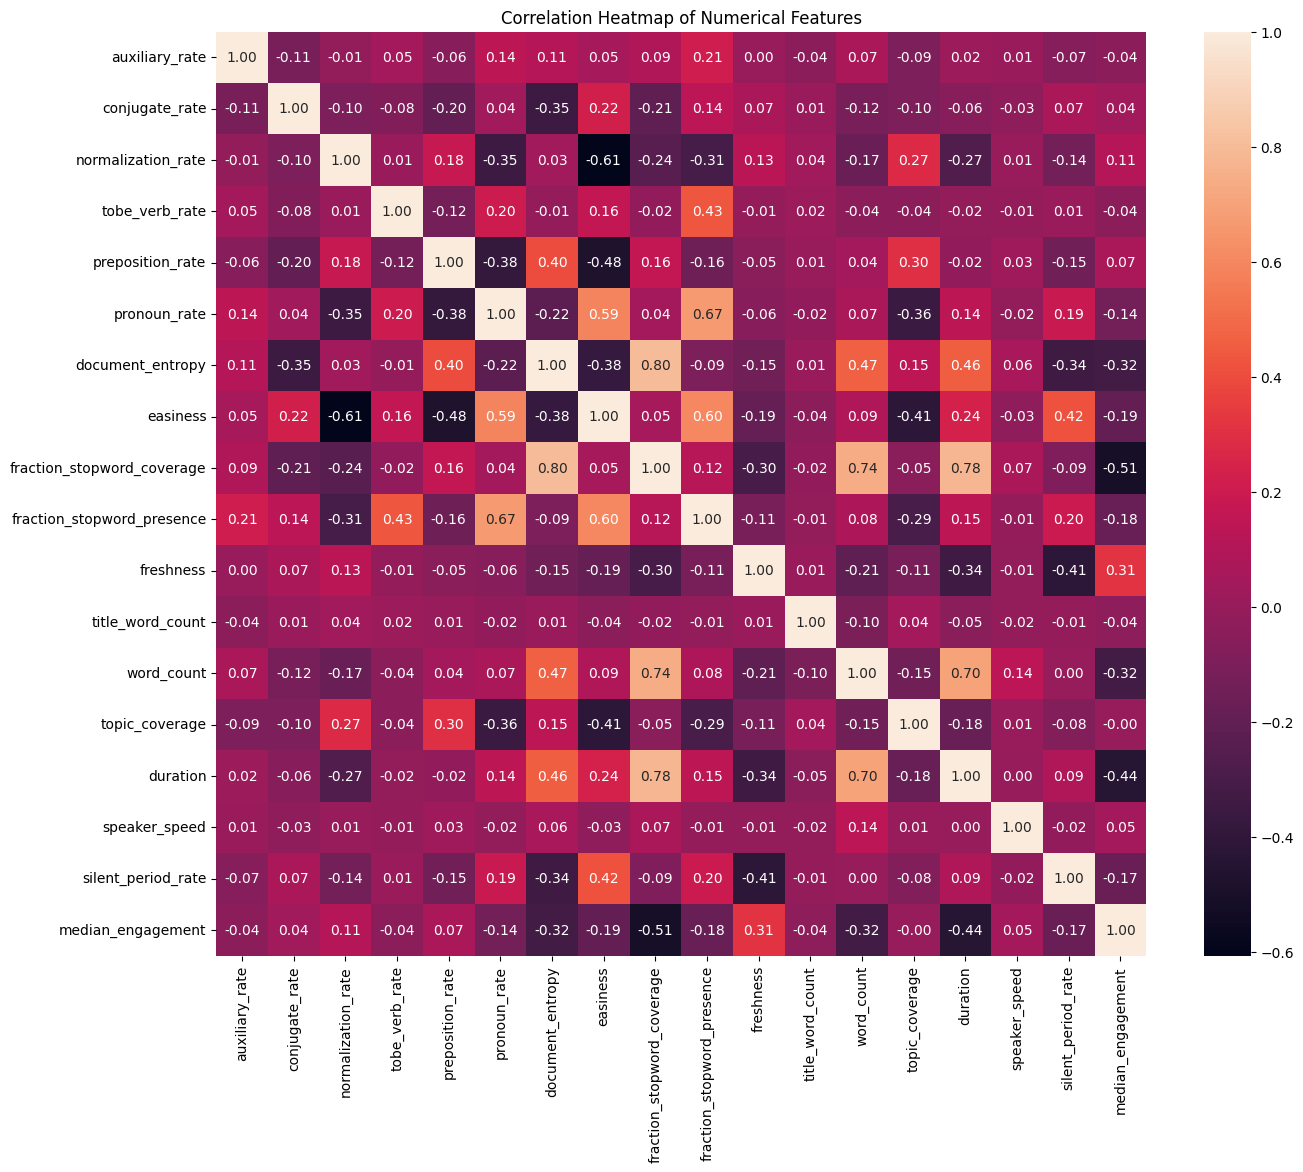

In [5]:
# Correlation heatmap for numerical variables
numerical_cols = [col for col in lectures.columns if lectures[col].dtypes != "O"]

corr_matrix = lectures[numerical_cols].corr()

plt.figure(figsize=(15, 12))
# sns.heatmap(corr_matrx, annot=True, fmt=".2f", ax=ax, cmap="YlGnBu")
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

#### Analysis 2


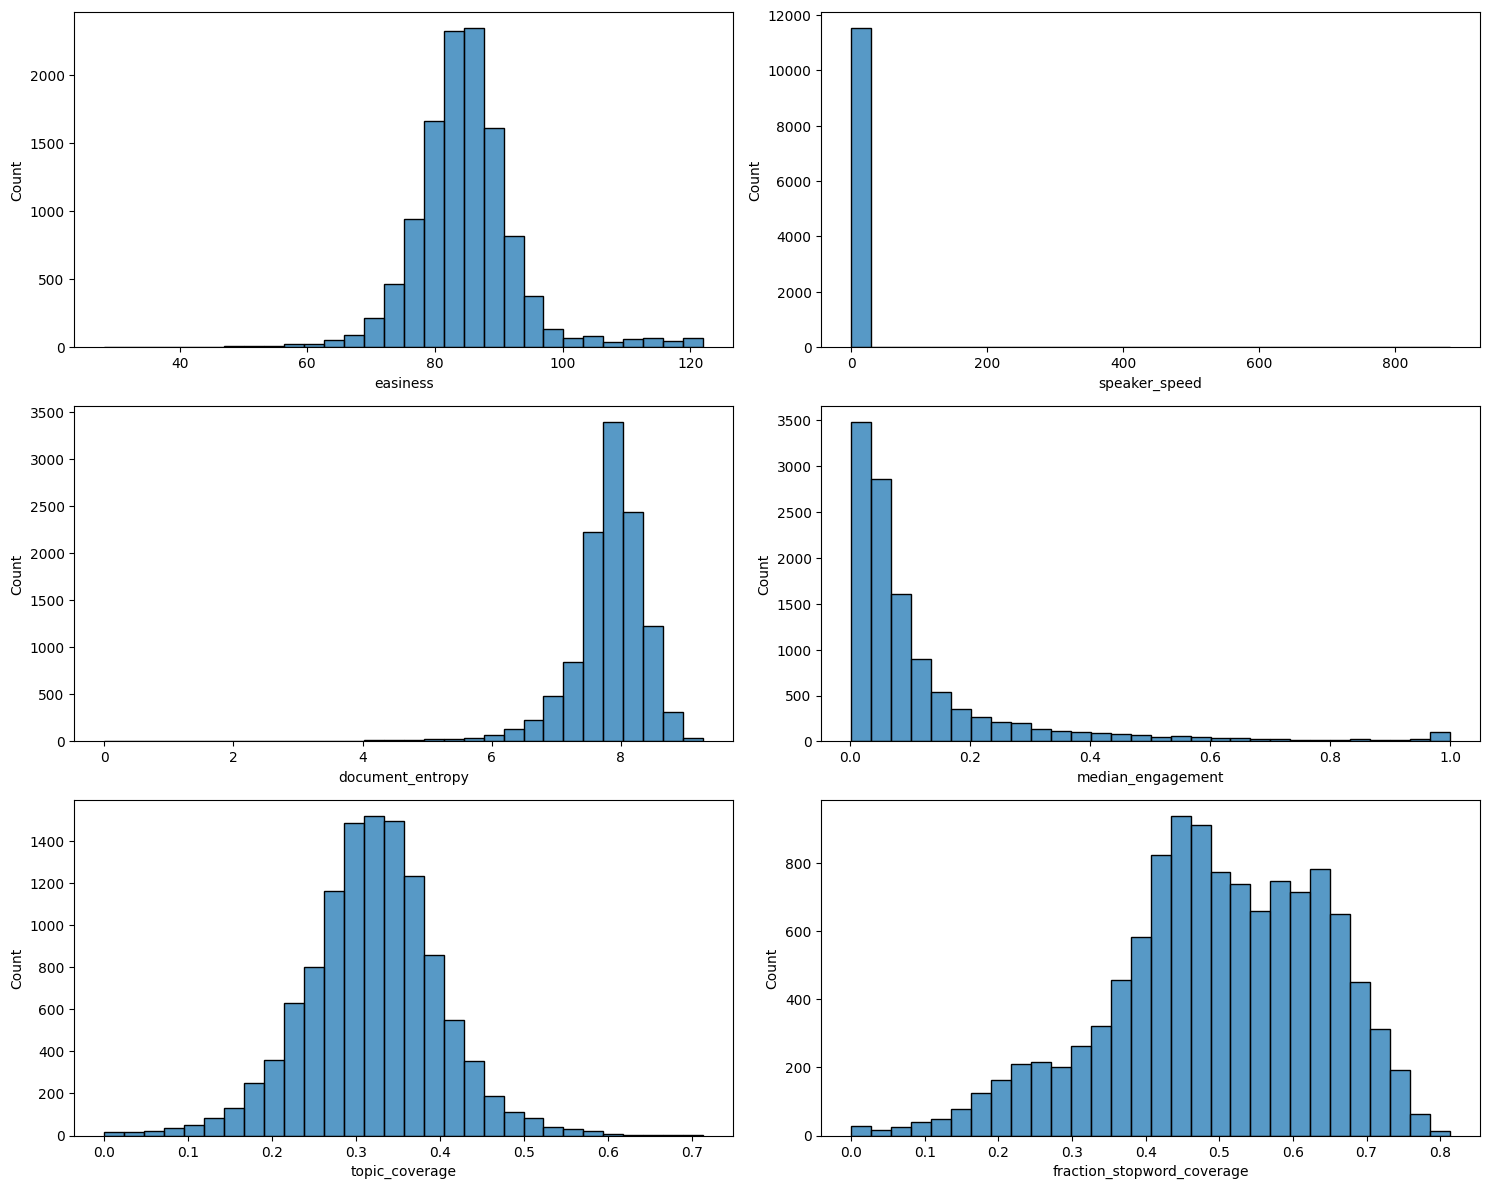

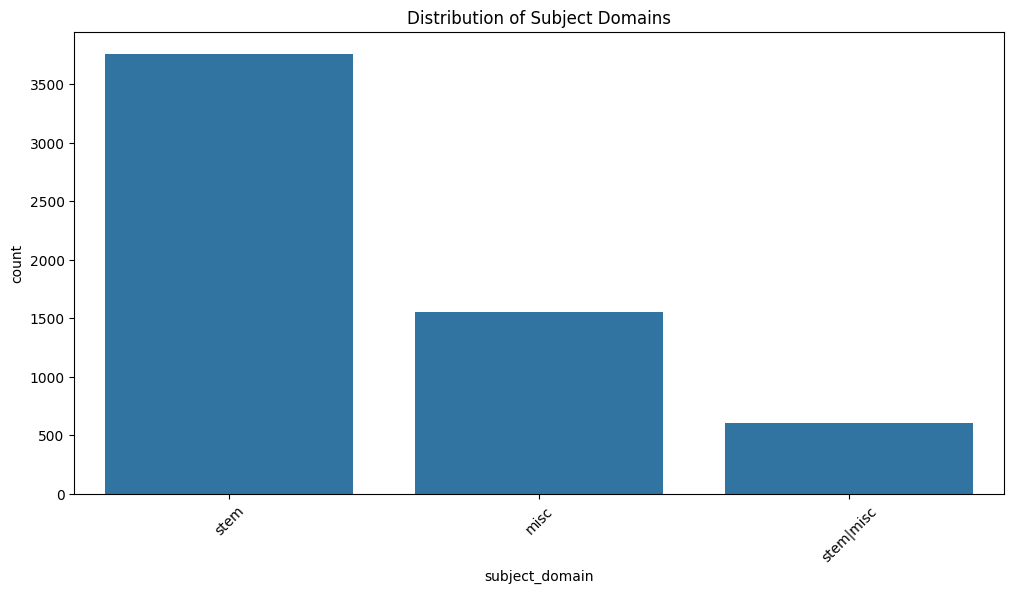

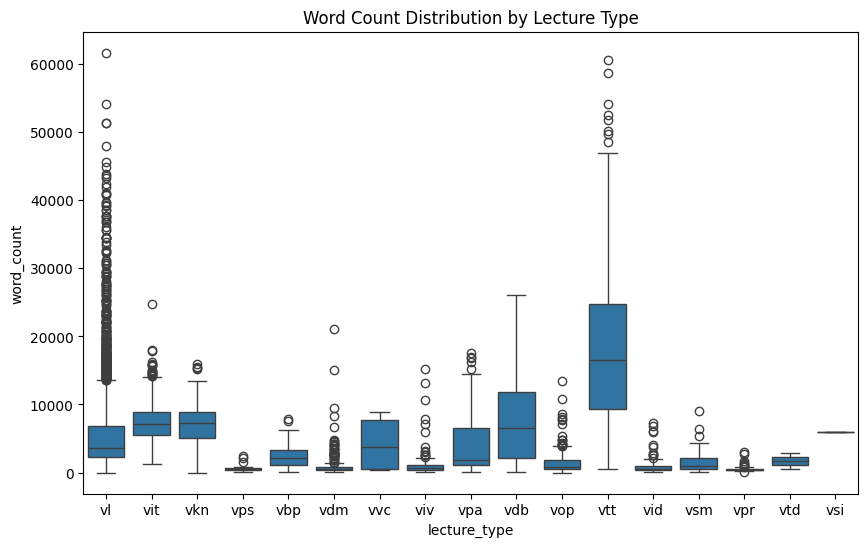

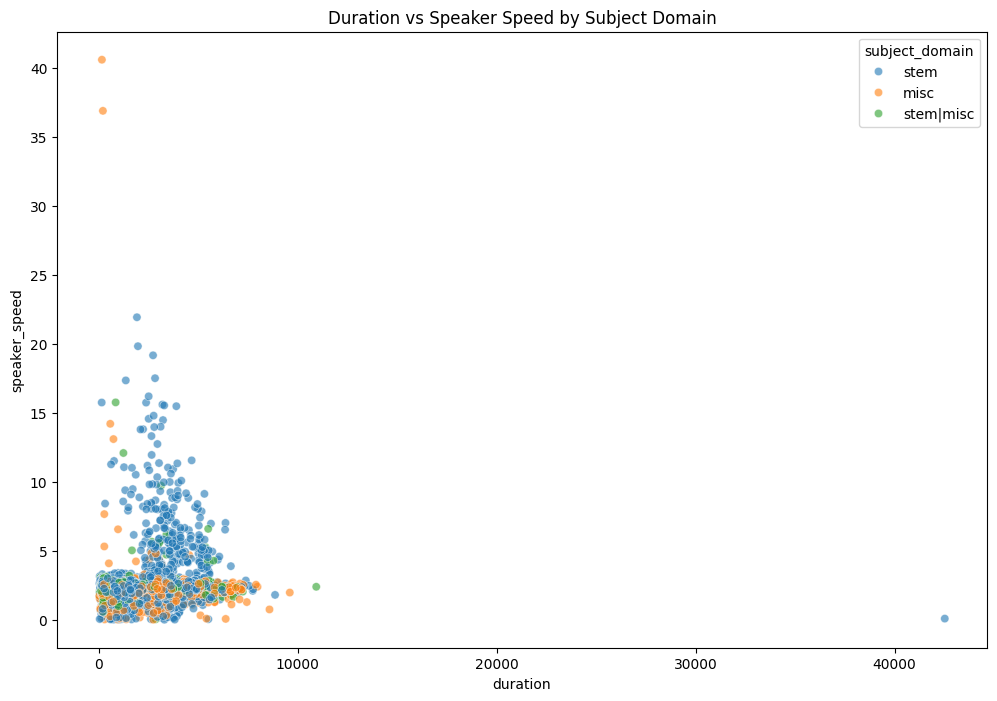

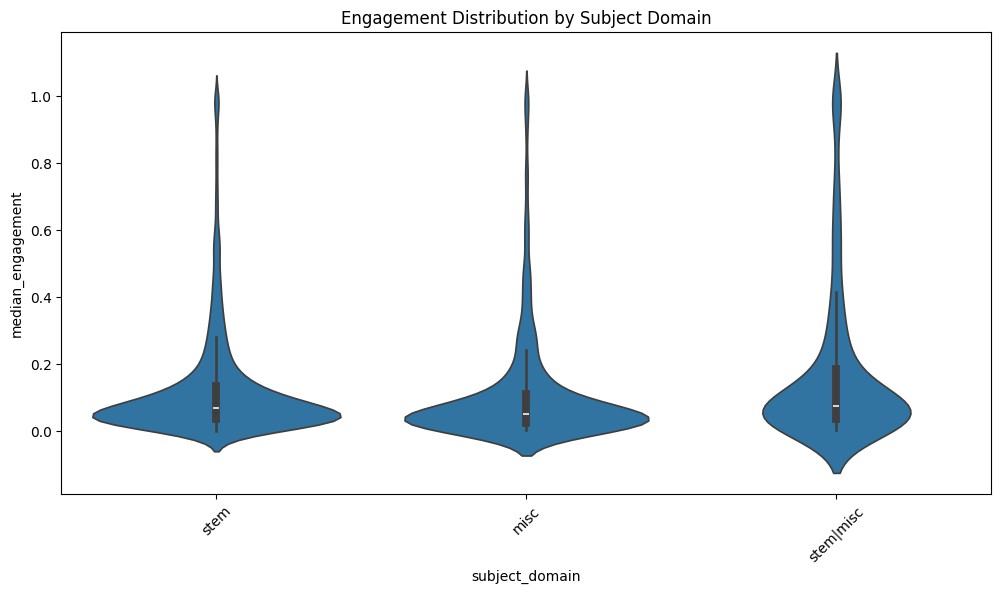

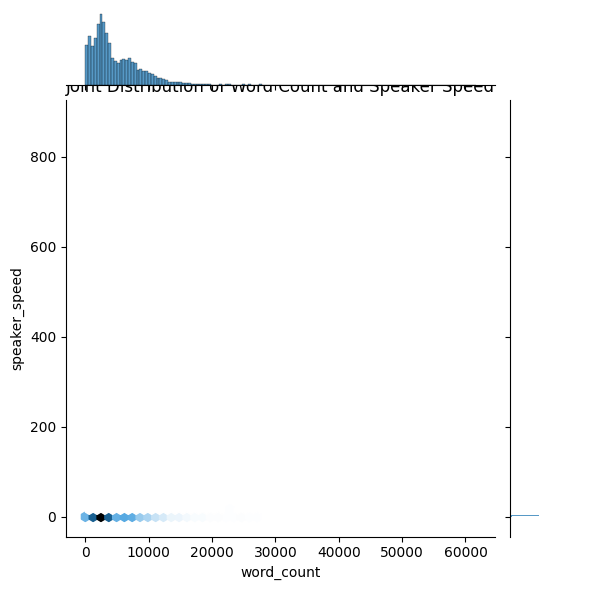

In [6]:
# Set the style and figure size
# plt.style.use('darkgrid')
plt.rcParams['figure.figsize'] = [12, 8]

# Distribution of continuous variables
fig1, axes = plt.subplots(3, 2, figsize=(15, 12))
sns.histplot(data=lectures, x='easiness', bins=30, ax=axes[0,0])
sns.histplot(data=lectures, x='speaker_speed', bins=30, ax=axes[0,1])
sns.histplot(data=lectures, x='document_entropy', bins=30, ax=axes[1,0])
sns.histplot(data=lectures, x='median_engagement', bins=30, ax=axes[1,1])
sns.histplot(data=lectures, x='topic_coverage', bins=30, ax=axes[2,0])
sns.histplot(data=lectures, x='fraction_stopword_coverage', bins=30, ax=axes[2,1])
plt.tight_layout()

# Categorical variable distributions
plt.figure(figsize=(12, 6))
sns.countplot(data=lectures, x='subject_domain')
plt.xticks(rotation=45)
plt.title('Distribution of Subject Domains')

# Box plot for word count by lecture type
plt.figure(figsize=(10, 6))
sns.boxplot(data=lectures, x='lecture_type', y='word_count')
plt.title('Word Count Distribution by Lecture Type')

# Scatter plot: duration vs speaker_speed colored by subject_domain
plt.figure(figsize=(12, 8))
sns.scatterplot(data=lectures, x='duration', y='speaker_speed', hue='subject_domain', alpha=0.6)
plt.title('Duration vs Speaker Speed by Subject Domain')

# Correlation heatmap for numerical variables
numerical_cols = ['auxiliary_rate', 'conjugate_rate', 'normalization_rate', 'tobe_verb_rate', 
                 'preposition_rate', 'pronoun_rate', 'document_entropy', 'easiness', 
                 'fraction_stopword_coverage', 'fraction_stopword_presence', 'topic_coverage',
                 'speaker_speed', 'silent_period_rate', 'median_engagement']
correlation_matrix = lectures[numerical_cols].corr()

# Violin plot for engagement by subject domain
plt.figure(figsize=(12, 6))
sns.violinplot(data=lectures, x='subject_domain', y='median_engagement')
plt.xticks(rotation=45)
plt.title('Engagement Distribution by Subject Domain')

# Joint plot for word_count and speaker_speed
sns.jointplot(data=lectures, x='word_count', y='speaker_speed', kind='hex')
plt.title('Joint Distribution of Word Count and Speaker Speed')

plt.show()

TODO: FIX THIS FUCKING GRAPH^^

#### Question 

Summarise the key findings of your analyses.

**Your Answer Here**

## $\color{Red}{Question\ 1.3.}$ Derive conclusions from your analyses and implement data preprocessing.
This question expects you to derive conclusions and implement preprocessing steps based on the analyses carried out in the previous question. Use the markdown cell to propose preprocessing steps and the code cell to implement the preprocessing function.  
- Based on the results obtained in the previous section, identify noteworthy observations (e.g. missing values, outliers etc.)? Describe what you observed and the implications.  
- How are you going to preprocess the dataset based on these observations? Justify your preprocessing steps in relation to the analyses. 
- In the subsequent code cell, implement the `preprocess_lecture_dataset` function to take the entire dataset as input and carry out preprocessing
- You may use additional code cells to implement sub-functions. 

#### Question: Justification

**Your Answer Here.**

In [ ]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

def preprocess_lecture_dataset(dataset: pd.DataFrame):
    """
    takes the lecture dataset and transforms it with necessary pre-processing steps.
    
    Params: 
        dataset (pandas.DataFrame): DataFrame object that contains the original dataset provided for the coursework
        
    Returns:
        preprocessed_dataset (pandas.DataFrame): DataFrame object that contains the dataset after data 
                                                pre-processing has been carried out
    """
    
    preprocessed_dataset = dataset.copy()
    
    #Subject_domain
    preprocessed_dataset['subject_domain'].fillna("Missing", inplace=True)

    #has_parts
    most_frequent_has_parts = preprocessed_dataset['has_parts'].mode()[0]
    preprocessed_dataset['has_parts'].fillna(most_frequent_has_parts, inplace=True)

    #remove outliers
    # Cap outliers for specific columns
    for column in ['tobe_verb_rate', 'easiness', 'fraction_stopword_presence', 'word_count', 'silent_period_rate']:
        upper_bound = dataset[column].quantile(0.95)
        dataset[column] = np.where(dataset[column] > upper_bound, upper_bound, dataset[column])
    
    
    # Identify numerical columns (excluding categorical ones)
    numerical_cols = preprocessed_dataset.select_dtypes(include=['float64', 'int64']).columns
    numerical_cols = [col for col in numerical_cols if col not in ['lecture_type', 'subject_domain', 'has_parts']]
    
    '''Handle Outliers'''
    total_outliers = 0
    for column in numerical_cols:
        Q1 = preprocessed_dataset[column].quantile(0.01)
        Q3 = preprocessed_dataset[column].quantile(0.99)
        IQR = Q3 - Q1
        
        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Create a mask for non-outlier rows
        mask = (preprocessed_dataset[column] >= lower_bound) & (preprocessed_dataset[column] <= upper_bound)
        
        # Keep track of how many outliers were removed
        n_outliers = (~mask).sum()
        if n_outliers > 0:
            total_outliers += n_outliers
            print(f"Dropped {n_outliers} outliers in {column}")
        
        # Remove outliers
        preprocessed_dataset = preprocessed_dataset[mask]
    print(f" -- {total_outliers} outliers dropped --")
    # Standardize numerical features
    scaler = StandardScaler()
    preprocessed_dataset[numerical_cols] = scaler.fit_transform(preprocessed_dataset[numerical_cols])
    
    '''Handle categorical variables'''
    preprocessed_dataset['has_parts'] = preprocessed_dataset['has_parts'].astype(int)
    
    '''OHE Categoricals'''
    categorical_cols = ['subject_domain', 'lecture_type']
    preprocessed_dataset = pd.get_dummies(preprocessed_dataset, columns=categorical_cols, drop_first=True)
    
    preprocessed_dataset = dataset    
    return preprocessed_dataset

In [130]:
preprocessed_lectures = preprocess_lecture_dataset(lectures)

Dropped 19 outliers in conjugate_rate
Dropped 1 outliers in preposition_rate
Dropped 12 outliers in pronoun_rate
Dropped 8 outliers in document_entropy
Dropped 6 outliers in fraction_stopword_presence
Dropped 1 outliers in duration
Dropped 13 outliers in speaker_speed
 -- 60 outliers dropped --


In [9]:
preprocessed_lectures

,auxiliary_rate,conjugate_rate,normalization_rate,tobe_verb_rate,preposition_rate,pronoun_rate,document_entropy,easiness,fraction_stopword_coverage,fraction_stopword_presence,...,title_word_count,word_count,most_covered_topic,topic_coverage,duration,lecture_type,has_parts,speaker_speed,silent_period_rate,median_engagement
0,0.013323,0.033309,0.034049,0.035159,0.121392,0.089563,7.753995,75.583936,0.428135,0.553664,...,9,2668.0,http://en.wikipedia.org/wiki/Kernel_density_es...,0.414578,890,vl,False,2.997753,0.000000,0.502923
1,0.014363,0.030668,0.018763,0.036749,0.095885,0.103002,8.305269,86.870523,0.602446,0.584498,...,6,7512.0,http://en.wikipedia.org/wiki/Interest_rate,0.292437,2850,vl,False,2.635789,0.000000,0.011989
2,0.019028,0.033242,0.030720,0.037827,0.118294,0.124255,7.965583,81.915968,0.525994,0.605685,...,3,4264.0,http://en.wikipedia.org/wiki/Normal_distribution,0.271424,1680,vit,False,2.538095,0.000000,0.041627
3,0.023416,0.042700,0.016873,0.046832,0.122590,0.104339,8.142877,80.148937,0.504587,0.593664,...,9,2869.0,http://en.wikipedia.org/wiki/Matrix_(mathematics),0.308092,1270,vl,False,2.259055,0.000000,0.064989
4,0.021173,0.041531,0.023412,0.038884,0.130700,0.102606,8.161250,76.907549,0.559633,0.581637,...,9,4840.0,http://en.wikipedia.org/wiki/Transport,0.414219,2000,vkn,False,2.420000,0.000000,0.052154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11543,0.014652,0.039166,0.031276,0.040011,0.111862,0.128487,7.781813,80.620236,0.498471,0.611722,...,11,3509.0,http://en.wikipedia.org/wiki/Time,0.352013,1600,vl,NaN,2.193125,0.194918,0.044655
11544,0.027689,0.036021,0.013967,0.048272,0.101936,0.135016,7.800766,94.080225,0.504587,0.654741,...,3,4029.0,http://en.wikipedia.org/wiki/File_system,0.379571,2550,vl,False,1.580000,0.338601,0.038525
11545,0.015825,0.026280,0.018486,0.036117,0.106924,0.123509,8.235828,95.173070,0.727829,0.618686,...,2,14121.9,http://en.wikipedia.org/wiki/Graph_(discrete_m...,0.245686,3710,vtt,True,5.548518,0.369348,0.012572
11546,0.005900,0.053097,0.032448,0.050147,0.117994,0.094395,6.775492,74.053098,0.189602,0.560472,...,13,337.0,http://en.wikipedia.org/wiki/Social_media,0.564922,130,vps,False,2.592308,0.005131,0.998364


In [10]:
preprocessed_lectures.columns

Index(['auxiliary_rate', 'conjugate_rate', 'normalization_rate',
       'tobe_verb_rate', 'preposition_rate', 'pronoun_rate',
       'document_entropy', 'easiness', 'fraction_stopword_coverage',
       'fraction_stopword_presence', 'subject_domain', 'freshness',
       'title_word_count', 'word_count', 'most_covered_topic',
       'topic_coverage', 'duration', 'lecture_type', 'has_parts',
       'speaker_speed', 'silent_period_rate', 'median_engagement'],
      dtype='object')

## $\color{Red}{Question\ 1.4}$ Numerically encode the dataset for model training.
This question expects you to create the final numerical dataset you will use to carry out model training with ridge regression.

- Implement the `prepare_final_dataset` function to transform different features.
- Features that belong to different data types need to be transformed to an ideal numerical representation
- You may use helper functions in `scikit-learn` machine learning library to implement this function.

In [11]:

def prepare_final_dataset(preprocessed_dataset):
    """
    takes the preprocessed lecture dataset and transforms it to the vector representation.
    
    Params: 
        preprocessed_dataset (pandas.DataFrame): DataFrame object that contains the original 
                                                dataset provided for the coursework
        
    Returns:
        X (pandas.DataFrame): DataFrame object that contains the features
        y (numpy.array): List of labels
    """
    target_feature = 'median_engagement'
    
    dataset = preprocessed_dataset.copy()
    y = dataset[target_feature].values
    
    #TODO: Drop more features, word_count, fraction_stopword_coverage, fraction_stopword_presence
    X = dataset.drop([target_feature, 'most_covered_topic'], axis=1)    
    
    # Remove the 'most_covered_topic' column
    dataset = preprocessed_dataset.drop('most_covered_topic', axis=1)
    # Label encoding for 'has_parts'
    le = LabelEncoder()
    X['has_parts'] = le.fit_transform(X['has_parts'])
    
    # One-hot encoding for 'subject_domain' and 'lecture_type'
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    categorical_cols = ['subject_domain', 'lecture_type']
    encoded_features = encoder.fit_transform(X[categorical_cols])
    
    # Create DataFrame with encoded features
    encoded_df = pd.DataFrame(
        encoded_features, 
        columns=encoder.get_feature_names_out(),
        index=X.index
    )
    
    # Drop original categorical columns and concatenate one-hot encoded columns
    X = X.drop(categorical_cols, axis=1)
    X = pd.concat([X, encoded_df], axis=1)
    
    return dataset, X, y

In [12]:
final_dataset, full_X, full_y = prepare_final_dataset(preprocessed_lectures)

In [13]:
full_X

,auxiliary_rate,conjugate_rate,normalization_rate,tobe_verb_rate,preposition_rate,pronoun_rate,document_entropy,easiness,fraction_stopword_coverage,fraction_stopword_presence,...,lecture_type_vl,lecture_type_vop,lecture_type_vpa,lecture_type_vpr,lecture_type_vps,lecture_type_vsi,lecture_type_vsm,lecture_type_vtd,lecture_type_vtt,lecture_type_vvc
0,0.013323,0.033309,0.034049,0.035159,0.121392,0.089563,7.753995,75.583936,0.428135,0.553664,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.014363,0.030668,0.018763,0.036749,0.095885,0.103002,8.305269,86.870523,0.602446,0.584498,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.019028,0.033242,0.030720,0.037827,0.118294,0.124255,7.965583,81.915968,0.525994,0.605685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.023416,0.042700,0.016873,0.046832,0.122590,0.104339,8.142877,80.148937,0.504587,0.593664,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.021173,0.041531,0.023412,0.038884,0.130700,0.102606,8.161250,76.907549,0.559633,0.581637,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11543,0.014652,0.039166,0.031276,0.040011,0.111862,0.128487,7.781813,80.620236,0.498471,0.611722,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11544,0.027689,0.036021,0.013967,0.048272,0.101936,0.135016,7.800766,94.080225,0.504587,0.654741,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11545,0.015825,0.026280,0.018486,0.036117,0.106924,0.123509,8.235828,95.173070,0.727829,0.618686,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11546,0.005900,0.053097,0.032448,0.050147,0.117994,0.094395,6.775492,74.053098,0.189602,0.560472,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
full_y

array([0.5029234 , 0.01198877, 0.04162666, ..., 0.01257177, 0.99836383,
       0.03274466])

Let us now save the final data

In [15]:
RESULTS_PATH = './results'
full_X.to_csv(os.path.join(RESULTS_PATH, "features_final.csv"), index=False)
np.save(os.path.join(RESULTS_PATH, "labels_final.npy"), full_y)

# Part 2: Modeling and Evaluation (30 Marks)

In this section, we develop a model using the preprocessed data. We start by loading the data that we saved in the previous part. 

In [16]:
full_X = pd.read_csv(os.path.join(RESULTS_PATH, "features_final.csv"))
full_y = np.load(os.path.join(RESULTS_PATH, "labels_final.npy"))

# If you didn't manage to save the preprocessed data structures from part one. 
# You can start the exercise with alternative data. But the performance will be very low. 

# full_X = pd.read_csv("features_seed.csv")
# full_y = np.load("labels_seed.npy")

## $\color{Red}{Question\ 2.1}$ Train Ridge Regression Model.
In this question, you are expected to derive a trained ridge regression model. 

- Implement the `train_model` function to output the trained ridge regression model.
- You may use helper functions and models in `scikit-learn` library

In [17]:
from sklearn.linear_model import Ridge

def train_ridge_model(X,y, hyperparams: dict):
    """
    takes the training data with the hyper-parameters to train the ridge model
    
    Params: 
        X (pandas.DataFrame): DataFrame object that contains the features
        y (numpy.array): List of labels
        hyperparams (dict): a dictionary of hyperparameters where the key is the hyperparameter name, 
                            and the value is the hyperparameter value
        
    Returns:
        ridge_model(scikit-learn model): A trained scikit-learn model object
        :
    """
    
    ridge_model = Ridge(**hyperparams)
    ridge_model.fit(X, y)
    
    return ridge_model

- Define the python dictionary `hyperparams` with the hyperparameters needed for Ridge Regression.

In [18]:
hyperparams = {
    'alpha': 1.0
}

In [19]:
temp_ridge_model = train_ridge_model(full_X[0:100], full_y[0:100], hyperparams)

In [20]:
print("Ridge model results: ")
print(temp_ridge_model.coef_)
print(temp_ridge_model.intercept_)

Ridge model results: 
[-2.84776432e-03 -1.04679978e-02  3.38988173e-03  4.40965609e-03
 -1.94602472e-02  5.25024171e-02 -1.40826248e-01 -2.58142107e-03
 -6.25312222e-02 -5.39976634e-02  1.07090382e-05 -8.11630468e-04
 -2.02062695e-06  2.69434041e-03  1.37693994e-05 -7.51333851e-03
  6.33141519e-03 -4.31498926e-02 -2.19034029e-02  5.54834599e-04
  1.05734251e-02  1.07751431e-02 -3.47876606e-02  0.00000000e+00
  1.13902860e-01  0.00000000e+00 -4.28155957e-02  9.26960683e-03
 -8.84882356e-03 -1.87342521e-02  0.00000000e+00  1.60879641e-03
  0.00000000e+00  1.88853107e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.84802423e-02]
1.32161049202343


## $\color{Red}{Question\ 2.2}$ Gaussian (RBF) Kernel Regression Model
In this question, you are expected to implement the Gaussian (Radial Basis Function/ RBF) kernel and use it with Ridge Regression to train a Kernel Ridge model that uses the Gaussian Kernel. 

- Implement the `gauss_kernel` function to output the similarity between two points (`x` and `x_dash`) using the Gaussian kernel. 
- You may use helper functions `numpy` and `scipy` libraries to speed up matrix computations. But the function should be implemented by you.

In [21]:
from scipy.spatial.distance import cdist

def gauss_kernel(x, x_dash, gamma):
    """
    takes two data points and calculates their similarity using the RBF function. 
    
    params: 
        x (numpy.array): point 1 coordinates 
        x_dash (numpy.array): point 2 coordinates
        gamma : relevant hyperparameter for the Gaussian Kernel
        
    returns:
        similarity (float): similarity between the two points
    """
    
    # Reshape to 2D
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    if len(x_dash.shape) == 1:
        x_dash = x_dash.reshape(1, -1)  
        
    # euclidean distance
    distances = cdist(x, x_dash, metric='sqeuclidean')
    
    similarity = np.exp(-gamma * distances)
    
    if similarity.shape == (1,1):
        return similarity[0,0]
              
    
    return similarity

- Implement the `train_kernel_ridge_model` function to output the trained kernel ridge regression model. 
- Use the relevant parameters in the [`sklearn.kernel_ridge.KernelRidge`](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn-kernel-ridge-kernelridge) function to pass the `gauss_kernel` function implemented earlier with kernel regression.
- Training this model may take some time ($\approx$ 10 minutes).

In [22]:
from sklearn.kernel_ridge import KernelRidge

def train_kernel_ridge_model(X: pd.DataFrame, y: np.array, hyperparams: dict, kernel_function: callable, kernel_params: dict):
    """
    takes the training data with the hyper-parameters to train the ridge model
    
    Params: 
        X (pandas.DataFrame): DataFrame object that contains the features
        y (numpy.array): List of labels
        hyperparams (dict): a dictionary of hyperparameters where the key is the hyperparameter name, 
                            and the value is the hyperparameter value
        kernel_function (callable): a callable python function which is the kernel function
        kernel_params (dict): a dictionary of kernel parameters where the key is the kernel parameter name, 
                            and the value is the parameter value
        
    Returns:
        kernel_ridge_model(scikit-learn model): A trained scikit-learn model object
    """
    
    kernel_ridge_model = KernelRidge(
        kernel=kernel_function,
        kernel_params=kernel_params,
        **hyperparams
    )
    kernel_ridge_model.fit(X, y)
    return kernel_ridge_model

In [23]:
hyperparams = {
    "alpha" : 0.1
}

kernel_params = {
    "gamma" : 1e-2
}

temp_kernel_ridge_model = train_kernel_ridge_model(full_X[0:100], full_y[0:100], hyperparams, gauss_kernel, kernel_params)

In [24]:
temp_y = temp_kernel_ridge_model.predict(full_X[0:100])
print(temp_y)

[0.45720309 0.01089888 0.03784242 0.05908127 0.0474129  0.23299961
 0.02930294 0.01369328 0.02352905 0.0289047  0.05461395 0.04245487
 0.40675335 0.03351096 0.0794425  0.06654843 0.20131001 0.08410886
 0.04687099 0.17125905 0.17416123 0.33317532 0.02408521 0.06027795
 0.03391129 0.07456689 0.05246781 0.87823747 0.01283054 0.28525399
 0.02568348 0.0248143  0.0468199  0.0103188  0.05084363 0.05652833
 0.01576719 0.43631558 0.1064889  0.29924072 0.07056646 0.0137745
 0.11172584 0.04322285 0.09509404 0.04953426 0.02881018 0.08589446
 0.00494808 0.04627296 0.07029358 0.02658334 0.04142942 0.12435203
 0.10867642 0.11591031 0.06268492 0.02055504 0.00766133 0.08702147
 0.01884916 0.38186066 0.0919624  0.04200721 0.04386024 0.02031625
 0.02218367 0.03153058 0.05507545 0.05754235 0.04274446 0.25268328
 0.05841936 0.00756728 0.05250568 0.10238842 0.03968408 0.04196584
 0.09443706 0.01456711 0.03878291 0.05620456 0.06337995 0.06381917
 0.02378797 0.1898604  0.02618575 0.0795077  0.15725513 0.17371

## $\color{Red}{Question\ 2.3}$ Propose and Implement two evaluation metrics that are suitable for model evaluation in this task. 
This question expects you to propose two evaluation metrics that can be used to assess predictive capabilities in this task and implement them.

- Propose two metrics by replacing `Your Answer Here`. You are encourage to propose metrics that go beyond the ones taught in class. 
- implement the two metrics while renaming function names from `eval_metric_1` and `eval_metric_2` to the metrics you are proposing. 

**Metric 1**

**For the first metric, I will use WMAE, or Weighted Mean Absolute Error. As, according to Wikipedia, it is a very commonly used loss function and is very intuitive. It is an extension of MAPE. Or Mean Absolute Percentage Error.**

$$\text{WMAE} = \frac{1}{\sum w_{i}}\sum_{i=1} w_i |  y_i - \hat{y}_i | $$


In [25]:
def WMAE(y_actual, y_predicted):
    """
    returns the evaluation metric. 
    
    Params: 
        y_actual (numpy.array): List of actual labels
        y_predicted (numpy.array): List of predicted labels
    
    Returns:
        metric (float): the evaluation metric
    """
    
    abs_errors = np.abs(y_actual - y_predicted)
    
    # Create weights based on actual engagement values
    # Videos with higher actual engagement get higher weights
    weights = 1 + 2 * y_actual  # This gives 1x weight at 0 engagement, 3x at full engagement
    
    # Normalize weights to sum to 1
    weights = weights / np.sum(weights)
    
    wmae = np.sum(weights * abs_errors)
 
    return wmae

**Metric 2**

**For my other metric, I will use plain old Mean Squared Error, or the L2 Loss. As it is easy to understand and I am familiar with it.**

In [26]:
def MSE(y_actual, y_predicted):
    """
    returns the evaluation metric. 
    
    Params: 
        y_actual (numpy.array): List of actual labels
        y_predicted (numpy.array): List of predicted labels
    
    Returns:
        metric (float): the evaluation metric
    """
    
    MSE = np.mean(np.power((y_actual - y_predicted), 2))

    return MSE

## $\color{Red}{Question\ 2.4}$ Evaluate the performance of the Ridge Regression model to detect overfitting. 
In this question, you are expected to implement a function to evaluate the predictive performance of a trained Ridge Regression model and detect if overfitting is evident. 

- Implement the `evaluate_ridge_model` function to take in the lectures data and
    - Handle the data carefully before training the model
    - Design a pipeline that incorporates comprehensive techniques to ensure robust and reliable model training and evaluation.
    - train the model 
    - evaluate the model using the proposed metrics and 
    - print the relevant information to assess model performance (including overfitting)
- The function does NOT have to return anything. Make sure it prints the relevant metrics instead. 
- You are expected to design the training methodology to end up training the most generalisable model from the data provided.

In [ ]:
from sklearn.model_selection import train_test_split

def evaluate_ridge_model(X,y):
    """
    trains the most viable model using the lecture data for median engagement prediction to evaluate it using the proposed metrics. 
    
    Params:
        X (pandas.DataFrame): features of the dataset
        y (numpy.array): labels
    """
    
    '''Data Splitting'''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69) #train_size=0.1)

    '''Train'''
    ridge_model = train_ridge_model(X_train, y_train, hyperparams)
    kernel_ridge_model = train_kernel_ridge_model(X_train, y_train, hyperparams, gauss_kernel, kernel_params)

    '''Eval'''
    y_pred_ridge = ridge_model.predict(X_train)
    y_pred_kernel_ridge = kernel_ridge_model.predict(X_train)

    wmae_ridge = WMAE(y_train, y_pred_ridge)
    mse_ridge = MSE(y_train, y_pred_ridge)
    print("-- Ridge Evaluation --")
    print("WMAE:: ", np.round(wmae_ridge, 5))
    print("MSE:: ", np.round(mse_ridge, 5))
    
    wmae_kernel_ridge = WMAE(y_train, y_pred_kernel_ridge)
    mse_kernel_ridge = MSE(y_train, y_pred_kernel_ridge)

    print("\n-- Kernel Ridge Evaluation --")
    print("WMAE:", np.round(wmae_kernel_ridge,5))
    print("MSE:", np.round(mse_kernel_ridge,5))
    
    '''Test'''
    y_pred_ridge = ridge_model.predict(X_test)
    y_pred_kernel_ridge = kernel_ridge_model.predict(X_test)
    
    wmae_ridge = WMAE(y_test, y_pred_ridge)
    mse_ridge = MSE(y_test, y_pred_ridge)
    print("\n-- Ridge Test -- ")
    print("WMAE: ", np.round(wmae_ridge,5))
    print("MSE: ", np.round(mse_ridge,5))

    wmae_kernel_ridge = WMAE(y_test, y_pred_kernel_ridge)
    mse_kernel_ridge = MSE(y_test, y_pred_kernel_ridge)
    print("\n-- Kernel Ridge Test --  ")
    print("WMAE:", np.round(wmae_kernel_ridge,5))
    print("MSE:", np.round(mse_kernel_ridge,5))

In [28]:
evaluate_ridge_model(full_X, full_y)

KeyboardInterrupt: 

#### Question

- Is the model exhibiting overfitting? Justify your answer


**Your Answer Here**

# Part 3: Ridge Regression: From Theory to Implementation (40 Marks)

In this section, we focus on understanding Ridge Regression better. Ridge Regression is the main modelling tool that we use throughout this coursework. It introduces a penalty to the objective of the model if the linear weights become too big. 

This part of the coursework expects the learner to gradually implement the ridge regression using matrix operations using python. This is expected to help the learners connect the mathematical derivations to the actual programmatic realisation of the learning algorithms. 

__Hints__: 
- All X,y inputs in the proceeding assumes multiple _observations_ are being passed

### Dataset

We use a pre-created dataset for this part of the exercise. Let us load the dataset. 

In [29]:
full_X = pd.read_csv("features_seed.csv")
full_y = np.load("labels_seed.npy")

## $\color{Red}{Question\ 3.1}$ Transform the data to matrix representations that are suitable for training a Ridge Regression model.  
In this question, you are expected to implement a function to prepare the feature and label data that we otherwise input to `scikit-learn` and prepare the matrix/vector representations.

- Implement the `prepare_data_for_training` function to take in the features and labels and return feature matrix/vector and label matrix/vector back. 
    - the function should take `pandas.DataFrame` objects as input. These DataFrames should have the data values that are passed to the `fit()` function of the `scikit-learn` model (ie. after all the preprocessing and other transformations)
    - you are expected to determine the suitable dimensionality for the output matrices
- You must NOT use any `scikit-learn` or any other machine learning library's functions within this function. It will be penalised.

In [30]:
full_y

array([0.5029234 , 0.01198877, 0.04162666, ..., 0.01257177, 0.99836383,
       0.03274466])

In [134]:
def prepare_data_for_training(X: pd.DataFrame, y: np.ndarray | None = None):
    """
    returns the matrices that are passed in to the training function of the ridge regression.
    
    Params:
        X (pandas.DataFrame): Features in the dataset
        y (pandas.DataFrame): Labels in the dataset, Optional
        
    Returns:
        X (numpy.array): X matrix/vector passed to the Ridge Regression training
        y (numpy.array): y matrix/vector passed to the Ridge Regression training
    """
    
    X = X.to_numpy()
    if y is not None:
        if type(y) != np.ndarray: 
            y = y.to_numpy()
    
    # Standardize features
    # X = (X - X.mean(axis=0)) / X.std(axis=0)    
    return X, y

In [135]:
X_, y_ = prepare_data_for_training(full_X, full_y)

In [136]:
assert X_.shape == (11548, 6)
print(X_.shape)
X_[0]

(11548, 6)


array([0.01332346, 0.03330866, 0.03404885, 0.03515914, 0.12139156,
       0.08956329])

## $\color{Red}{Question\ 3.2}$ Implement the training and prediction functions of the Ridge Regression model (primal form).  
This question expects you to implement the training and prediction capabilities of the ridge regression model. 

- Implement the `fit_ridge_reg` function to take in the features, labels and the hyper-parameters to return the trained parameters of the model. 
- You are expected to use the Primal form when implementing the fitting step.
- You are NOT allowed to use `scikit-learn` functions here. It will be penalised.

$$w = (X^{\intercal}X + \lambda I_n)^{-1}X^{\intercal}y$$
$$\text{Note to self: the 'primal' form just means we aren't using any Lagrange multipliers (Dual form).}$$ 
$$\text{But they are just two different ways of arriving to the same solution.}$$
Where:

X is the feature matrix 

y is the label vector

λ is the regularization parameter

I_n is the identity matrix

See: https://stats.stackexchange.com/questions/92672/difference-between-primal-dual-and-kernel-ridge-regression

In [137]:
def fit_ridge_reg(X: np.ndarray, y: np.array, hyperparams: dict):
    """
     Params:
        X (numpy.array): X matrix/vector passed to the Ridge Regression training
        y (numpy.array): y matrix/vector passed to the Ridge Regression training
        hyperparams (dict): a dictionary where the key is the hyperparameter name 
                            and values is the hyperparameter value
        
    Returns:
       _theta (numpy.array): the trained parameters of the model
    """
    
    LAMBDA = hyperparams['lambda']
    X = np.hstack((np.ones((X.shape[0], 1)), X))    
    n_features = X.shape[1]
    # X'X
    # Note, @ is shorthand for np.matmul 
    X_transpose_X = X.T @ X
    # X'X + l * I
    regularized_matrix = X_transpose_X + LAMBDA * np.eye(n_features)
    # inverse of ^
    inverse_matrix = np.linalg.inv(regularized_matrix)
    
    X_transpose_y = X.T @ y
    w = np.matmul(inverse_matrix, X_transpose_y)
    # TODO Add bias term?
    _theta = w
    print("X_transpose_X shape:", X_transpose_X.shape)
    print("regularized_matrix shape:", regularized_matrix.shape)
    print("X_transpose_y shape:", X_transpose_y.shape)
    print("w shape:", w.shape)    
    
    return _theta    

In [138]:
hyperparams = {
    "lambda": 10
}
#This seems like a very low lambda...
theta = fit_ridge_reg(X_, y_, hyperparams)

X_transpose_X shape: (7, 7)
regularized_matrix shape: (7, 7)
X_transpose_y shape: (7,)
w shape: (7,)


In [139]:
print("The shape of theta matrix/vector: {} \n\n The values are: \n {}".format(theta.shape, theta))

The shape of theta matrix/vector: (7,) 

 The values are: 
 [ 0.14380357 -0.02658291  0.10172896  0.14544889 -0.04916084  0.14014123
 -0.35603588]


- Implement the relevant parts of the `RidgeRegression` class below.
    - add relevant object attributes including hyperparameters
    - `fit` and `predict` functions need to be implemented as well 
- You may reuse the functions you implemented previously in this part of the assignment
- You are NOT allowed to use `scikit-learn` functions here. It will be penalised. 

In [140]:
class RidgeRegression():
    def __init__(self, hyperparams: dict):
        """
        instantiates the class
        
        Params:
            hyperparams (dict): a dictionary where the key is the hyperparameter name 
                            and values is the hyperparameter value
        """
        
        self.fitted = False # indicates whether the model is already trained or not
        self.LAMBDA = hyperparams['lambda']
        print(self.LAMBDA)
        self._theta = None
        # self.THETA = hyperparams['theta']
        
        
    def fit(self, X: pd.DataFrame, y: pd.DataFrame):
        """
        trains the model given the data. Updates  models internal parameters

        Params:
            X (pandas.DataFrame): Features in the dataset
            y (pandas.DataFrame): Labels in the dataset
        """
        X, y = prepare_data_for_training(X, y)
        print('X: ', X.shape)
        print('Y: ', y.shape)
        self._theta = fit_ridge_reg(X, y, {'lambda': self.LAMBDA})
        self.fitted = True
        
        
        
    def predict(self, X: np.ndarray):
        """
        makes predictions from given features. 
        ! The model should be trained first. Otherwise throws an error.

        Params:
            X (pandas.DataFrame): Features in the dataset
        """
        assert self.fitted, f"Model is not fitted: self.fitted={self.fitted}"
        X = X.to_numpy()
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        return X @ self._theta

In [141]:
hyperparams = {
    "lambda": 100
}

RR = RidgeRegression(hyperparams)

100


In [142]:
print("Attributes of the RidgeRegression Instance Before Training: \n{}".format(RR.__dict__))

Attributes of the RidgeRegression Instance Before Training: 
{'fitted': False, 'LAMBDA': 100, '_theta': None}


- Train the model with the appropriate data using the `fit` function of the model instance.

In [143]:
RR.fit(full_X, full_y)

X:  (11548, 6)
Y:  (11548,)
X_transpose_X shape: (7, 7)
regularized_matrix shape: (7, 7)
X_transpose_y shape: (7,)
w shape: (7,)


In [144]:
print("Attributes of the RidgeRegression Instance After Training: \n{}".format(RR.__dict__))

Attributes of the RidgeRegression Instance After Training: 
{'fitted': True, 'LAMBDA': 100, '_theta': array([ 0.12171041, -0.00203329,  0.0151574 ,  0.02187584, -0.00343725,
        0.03817595, -0.0572481 ])}


**Question**:

- Get predictions from the trained model and show that the predictions have a linear correlation with the actual labels. For __this question__, you are allowed to use scientific computing packages such as `scikit-learn` or `sciPy`

In [145]:
full_X.shape
full_y.shape

(11548,)

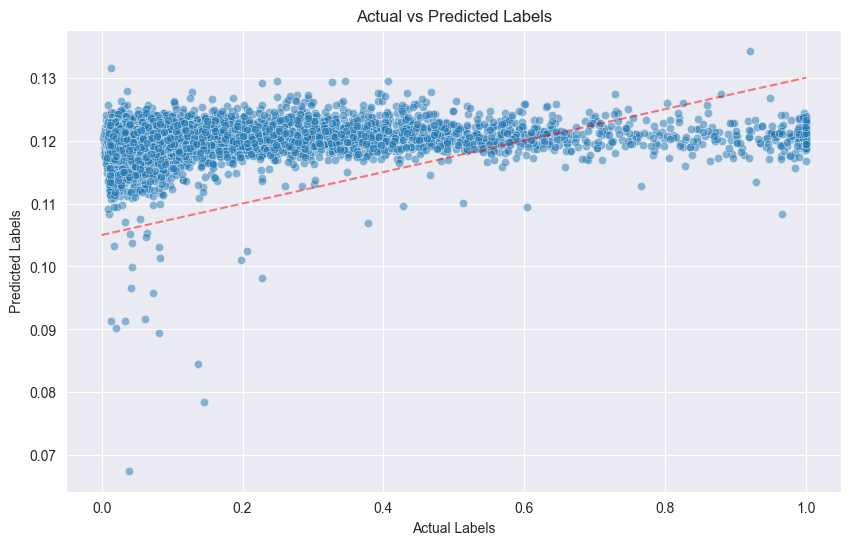

Correlation Matrix:
 [[1.         0.14663786]
 [0.14663786 1.        ]]


In [146]:
y_pred = RR.predict(full_X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=full_y, y=RR.predict(full_X), alpha=0.5)
# sns.jointplot(x=full_y, y=RR.predict(full_X), kind='hex')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Actual vs Predicted Labels')

# Add diagonal line representing perfect predictions
plt.plot([.105, .13], 'r--', alpha=0.5)  # red dashed line
plt.show()

corr_matrix = np.corrcoef(full_y, y_pred)
print("Correlation Matrix:\n", corr_matrix)

**Question**: Why did you use the above method? Justify your answer

**Your Answer Here**

## $\color{Red}{Question\ 3.3}$ Ridge Regression in the Online Learning Setting
In this question, we create several building blocks required to learn with Ridge Regression in an online setting using stochastic gradient descent. You are first expected to derive the first derivative of the Ridge Regression loss function. 

- Implement the `ridge_reg_loss_derivative` function to take in the features, labels, parameters, and hyperparameters, and return the first derivative $\frac{\delta \mathcal{L}}{\delta \theta}$ of the loss function $ \mathcal{L}$. 

$\text{Our loss has two components, MSE and the L2 Norm (aka Ridge)}$
$$\mathcal{L}(\theta) = \frac{1}{n}\sum_{i=1}^n(y_i - X_i\theta)^2 + \lambda|\theta|_2^2$$
$\text{Differentiable everywhere, unlike L1 Norm which can be a crazy polynominial or some weird function.}$

$$\frac{\delta \mathcal{L}}{\delta \theta} = \frac{1}{n}\sum_{i=1}^n(y_i - X_i\theta)^2 + \lambda|\theta|_2^2$$


$$ \text{Let's do the MSE Term first} $$

$$ \frac{1}{n}\sum_{i=1}^n \frac{\delta \mathcal{L}}{\delta \theta} (y_i - X_i\theta)^2 $$
$$ = \frac{1}{n}\sum_{i=1}^n 2(y_i - X_i\theta)(-X_i)$$

$$ \text{Next, the L2 Norm} $$
$$ \frac{\delta \mathcal{L}}{\delta \theta} \lambda|\theta|_2^2 $$
$$ \lambda\sum{j=1}^d \theta_j^2 $$
$$\frac{\partial \mathcal{L}}{\partial \theta}(\lambda|\theta|_2^2) = 2\lambda\theta$$

$$ \text{Add the partials} $$
$$= \frac{1}{n}\sum_{i=1}^n 2(y_i - X_i\theta)(-X_i) +  2\lambda\theta $$


In [44]:
def ridge_reg_loss_derivative(X, y, theta, hyperparams):
    """
    takes data, parameters and hyperparameters to calculate the first derivative of ridge loss
    
    Params:
        X (numpy.array): a matrix/vector of features 
        y (numpy.array): a matrix/vector of labels 
        theta (numpy.array): a matrix/vector of parameters being trained 
        hyperparams (dict): a dictionary where the key is the hyperparameter name 
                            and values is the hyperparameter value
                            
    Returns:
        derivative (numpy.array): the derivative used for updating the parameters
    """
    LAMBDA = hyperparams['lambda']
    NUM_SAMPLES = X.shape[0]
    
    # print(f"Ridge_Reg_Loss:: X shape: {X_.shape} Y shape {y_.shape} theta {theta.shape}")
    predictions = np.dot(X, theta)  # X_i * theta
    errors = y - predictions  # (y_i - X_i * theta)
    mse_derivative = (-2 / NUM_SAMPLES) * np.dot(X.T, errors)  # (1/n) * sum(2(y_i - X_i*theta)(-X_i))
    
    l2_derivative = 2 * LAMBDA * theta 
    
    derivative = mse_derivative + l2_derivative
    
    return derivative

- Implement the `train_stoch_ridge_reg` function to take data, parameters and hyperparameters  and return the updated theta
- You are not allowed to use machine learning libraries such as `scikit-learn` or tensor computation libraries such as `tensorflow`, `keras`, `pytorch` etc. in this section. You will be penalised for using such libraries. 

In [ ]:
def train_stoch_ridge_reg(X, y, _theta, hyperparams):
    """
    takes data, parameters and hyperparameters and returns the updated parameters 
    from training with data
    
    Params:
        X (numpy.array): a matrix/vector of features 
        y (numpy.array): a matrix/vector of labels 
        _theta (numpy.array): a matrix/vector of parameters being trained 
        hyperparams (dict): a dictionary where the key is the hyperparameter name 
                            and values is the hyperparameter value
                            
    Returns:
        _theta (numpy.array): a matrix/vector of parameters updated after training
    """
    n_samples = X.shape[0]
    learning_rate = hyperparams['learning_rate']
    
    idxs = np.random.permutation(n_samples)
    
    for i in idxs:
        X_i = X[i:i+1] 
        y_i = y[i:i+1]
        
        gradient = ridge_reg_loss_derivative(X_i, y_i, _theta, hyperparams)
        
        _theta = _theta - learning_rate * gradient
    
    return _theta

## $\color{Red}{Question\ 3.4}$ Train and Monitor the Stochastic Ridge Regression Model
In this question, you are expected to use the previously defined stochastic gradient training function (`train_stoch_ridge_reg`) to train a ridge regression model using the `X_, y_` data structures from before. Record the relevant loss values computed in each iteration to analyse if the loss is diminishing over time. 

- Implement `train_entire_model` function to take the dataset and train the model over multiple iterations. 
    - Run the model for 2000 iterations to reduce the loss values over time
- Record the loss $\mathcal{L}$ values of the model over all the iterations.
- pass the list of losses as output from this function.

**Hints:**

- Set the initial weights (thetas) to a normal distribution scattered around mean 0. 
- As the penalisation constant in the Ridge Regression, 0.1 is a good value to use
- A learning rate between 1e-6 and 1e-10 may be suitable for this task

In [ ]:
from tqdm.notebook import tqdm

def calculate_loss(X, y, theta, hyperparams: dict):
    """Calculate Ridge Regression loss"""
    n = len(X)
    predictions = np.dot(X, theta)
    mse = np.mean((y - predictions) ** 2)
    reg_term = hyperparams['lambda'] * np.sum(theta ** 2)
    return mse + reg_term

def train_entire_model(X_, y_, hyperparams: dict):
    """
    takes data, hyperparameters and returns the list of losses 
    
    Params:
        X_ (numpy.array): a matrix/vector of features 
        y_ (numpy.array): a matrix/vector of labels 
        hyperparams (dict): a dictionary where the key is the hyperparameter name 
                            and values is the hyperparameter value
                            
    Returns:
        losses ([float]): list of loss values for each iteration of learning
    """
    losses = []
    n_features = X_.shape[1]
    
    theta = np.random.normal(0, 1, n_features)
    
    ITERS = hyperparams['iterations']
    
    for i in tqdm(range(ITERS), desc="Training Ridge Model"):
        theta = train_stoch_ridge_reg(X_, y_, theta, hyperparams)
        print(theta)
        current_loss = calculate_loss(X_, y_, theta, hyperparams)
        losses.append(current_loss)
    
    return losses

In [118]:
X_, y_ = X_, y_ # Reusing data structures from before

hyperparameters = {
    "iterations": 500,
    "lambda": 0.1,
    "learning_rate": 1e-7
}

losses = train_entire_model(X_, y_, hyperparameters)

Training Ridge Model:   0%|          | 0/500 [00:00<?, ?it/s]

[-1.54236432  0.77065191  0.93974875  1.21816768 -1.31073238  1.50884997]
[-1.53904608  0.76802728  0.93926474  1.21428878 -1.30596069  1.504447  ]
[-1.53573437  0.76541208  0.938776    1.21042227 -1.30120678  1.50005976]
[-1.53242929  0.7628059   0.93828266  1.20656808 -1.2964703   1.49568844]
[-1.52913072  0.76020904  0.93778467  1.20272619 -1.29175136  1.49133284]
[-1.52583871  0.75762117  0.93728201  1.19889654 -1.28704979  1.48699306]
[-1.52255319  0.75504247  0.93677466  1.19507919 -1.28236573  1.48266885]
[-1.51927428  0.75247269  0.93626299  1.19127382 -1.27769882  1.47836034]
[-1.51600184  0.74991204  0.93574665  1.18748077 -1.27304919  1.47406726]
[-1.51273601  0.74736016  0.93522596  1.18369967 -1.2684166   1.4697898 ]
[-1.50947669  0.74481728  0.93470077  1.17993062 -1.26380115  1.46552769]
[-1.50622386  0.74228332  0.93417121  1.17617358 -1.25920272  1.46128092]
[-1.50297741  0.73975843  0.9336372   1.17242854 -1.25462134  1.45704938]
[-1.49973746  0.73724228  0.93309878  

In [124]:
losses[0:10]

[np.float64(11.006281635680022),
 np.float64(10.941045970033516),
 np.float64(10.87623574803825),
 np.float64(10.811847233247013),
 np.float64(10.747878006942171),
 np.float64(10.684324930490682),
 np.float64(10.621185635885126),
 np.float64(10.55845598862321),
 np.float64(10.496134318168883),
 np.float64(10.434216721731213)]

- Implement the `visualise_loss_values` function to use the appropriate visualisations to plot the loss values in a meaningful way.
- The function does not have to return anything. Display the visualisation as a step within the implemented function.

In [122]:
def visualise_loss_values(loss_values):
    """
    takes relevant loss values and plots the loss values in the dataset over the iterations (epochs).
    
    Params:
        loss_values (dict): a dictionary that contains the loss values where key is the loss type
                            and values are the loss values.
    """
    sns.set_style('darkgrid')
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=loss_values,
        linewidth=1,
        color='#2E86C1', 
        alpha=0.8
    )
    plt.title('Ridge Regression Loss Over Training Iterations', 
             fontsize=14, 
             pad=20)
    plt.xlabel('Iteration', fontsize=12)
    plt.ylabel('Loss Value', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.ylim(bottom=0)
    plt.tick_params(labelsize=10)
    
    plt.gca().set_facecolor('#f8f9fa')
    plt.tight_layout()
    plt.show()


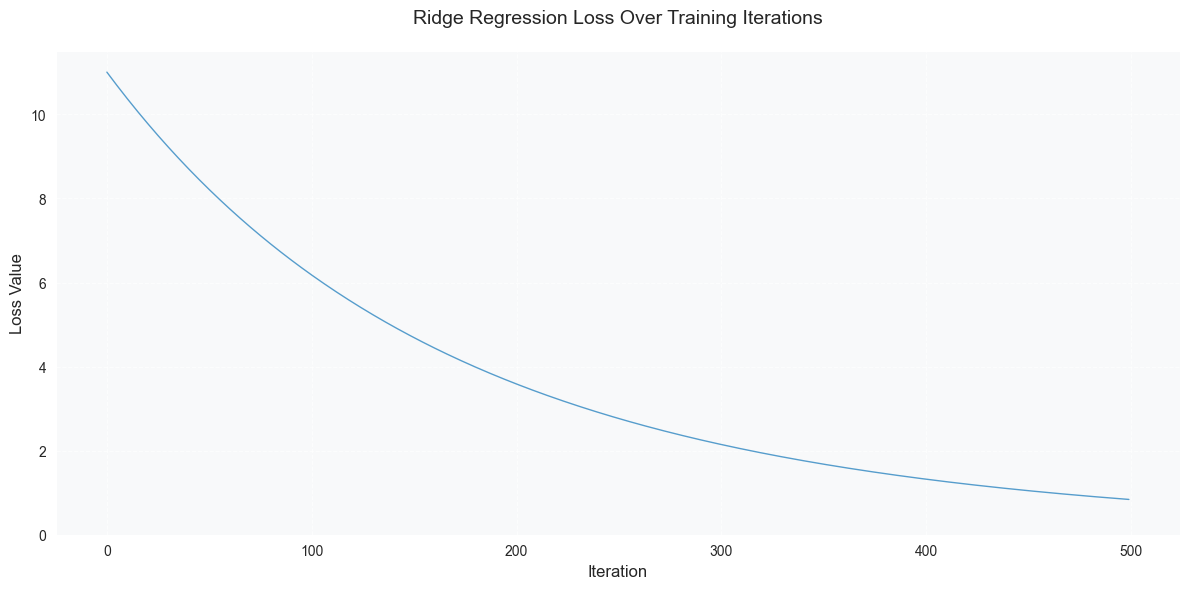

In [123]:
visualise_loss_values(losses)

**Question:**
- Does the loss get smaller over time? In either case, explain the reason behind it.
- For both the regularisation factor and the learning rate, plot the loss with a sample of larger and smaller values for each hyperparameter. Observe how the loss changes for each hyperparameter _individually_ and draw hypotheses justifying these observations. 
    - __Note: you do not need to interpret the joint effects of changing the hyperparameter values__

**Your Answer Here**

## - End of Coursework - 